In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
 
import numpy as np
 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
 
from sklearn.metrics import confusion_matrix, classification_report
import itertools
 
%matplotlib inline

# New section

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


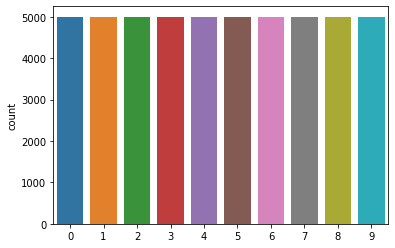

In [ ]:
  Y_test=y_test
  # Count plot for training set
  sns.countplot(y_train.ravel())

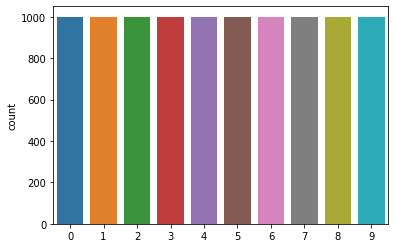

In [ ]:
# Count plot for test set
sns.countplot(y_test.ravel())

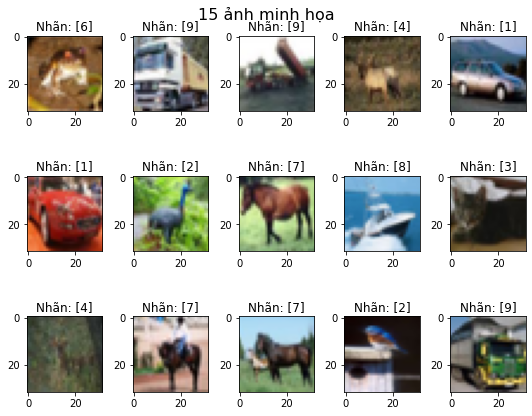

In [ ]:
num_row = 3
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
fig.suptitle("15 ảnh minh họa", fontsize=16)
for i in range(num_row * num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('Nhãn: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

In [ ]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# Convert class vectors to binary class matrices. This is called one hot encoding.
num_classes = 10  
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
print(x_test)

[[[[0.61960787 0.4392157  0.19215687]
   [0.62352943 0.43529412 0.18431373]
   [0.64705884 0.45490196 0.2       ]
   ...
   [0.5372549  0.37254903 0.14117648]
   [0.49411765 0.35686275 0.14117648]
   [0.45490196 0.33333334 0.12941177]]

  [[0.59607846 0.4392157  0.2       ]
   [0.5921569  0.43137255 0.15686275]
   [0.62352943 0.44705883 0.1764706 ]
   ...
   [0.53333336 0.37254903 0.12156863]
   [0.49019608 0.35686275 0.1254902 ]
   [0.46666667 0.34509805 0.13333334]]

  [[0.5921569  0.43137255 0.18431373]
   [0.5921569  0.42745098 0.12941177]
   [0.61960787 0.43529412 0.14117648]
   ...
   [0.54509807 0.38431373 0.13333334]
   [0.50980395 0.37254903 0.13333334]
   [0.47058824 0.34901962 0.12941177]]

  ...

  [[0.26666668 0.4862745  0.69411767]
   [0.16470589 0.39215687 0.5803922 ]
   [0.12156863 0.34509805 0.5372549 ]
   ...
   [0.14901961 0.38039216 0.57254905]
   [0.05098039 0.2509804  0.42352942]
   [0.15686275 0.33333334 0.49803922]]

  [[0.23921569 0.45490196 0.65882355]
   [0.1

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

# Keras defines a sequential model as a sequential stack of linear layers.
model=Sequential()

# here we using 32 filter layers and kernel size of (3,3), with relu activation function (max(0,x))
# Batch normalization() is a technique for improving the speed, performance, and stability of cnn.
# max pooling reduces the dimensionality of images by reducing the number of pixels in the output from previous cnn
# pool size define size of filter
# Droupout drops out the nodes from the layer and reduce chances of overfitting

#1st layer is input layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2nd layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3rd layer
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatten convert matrix into single array
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Finally we compile our model with rsmprop optimizer
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#One way to avoid overfitting is to terminate the process early using earlystop
earlystop = EarlyStopping(patience = 10)

# Following line will reduce learning rate when a metric has stopped improving. 
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)

callbacks = [earlystop,learning_rate_reduction]

In [ ]:

history = model.fit(x_train, y_train,
              batch_size=32,
              epochs=20,
              validation_data=(x_test, y_test),
              callbacks=callbacks,
                    shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 119s 2ms/step - loss: 1.7229 - accuracy: 0.4260 - val_loss: 1.5320 - val_accuracy: 0.4824
Epoch 2/20
   64/50000 [..............................] - ETA: 1:48 - loss: 1.3482 - accuracy: 0.4844

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 119s 2ms/step - loss: 1.2427 - accuracy: 0.5623 - val_loss: 1.0736 - val_accuracy: 0.6265
Epoch 3/20
50000/50000 [==============================] - 119s 2ms/step - loss: 1.1075 - accuracy: 0.6125 - val_loss: 1.2977 - val_accuracy: 0.5560
Epoch 4/20
50000/50000 [==============================] - 122s 2ms/step - loss: 1.0297 - accuracy: 0.6402 - val_loss: 1.1355 - val_accuracy: 0.6043
Epoch 5/20
50000/50000 [==============================] - 123s 2ms/step - loss: 0.9673 - accuracy: 0.6648 - val_loss: 2.3491 - val_accuracy: 0.4120
Epoch 6/20
50000/50000 [==============================] - 127s 3ms/step - loss: 0.9195 - accuracy: 0.6800 - val_loss: 1.1798 - val_accuracy: 0.6040
Epoch 7/20
50000/50000 [==============================] - 122s 2ms/step - loss: 0.8960 - accuracy: 0.6905 - val_loss: 1.0884 - val_accuracy: 0.6254
Epoch 8/20
50000/50000 [==============================] - 121s 2ms/step - loss: 0.8699 - accuracy: 0.7009 - val_loss: 0.837

In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# making prediction
predictions = model.predict(x_test)

10000/10000 [==============================] - 7s 673us/step
Test accuracy: 0.7282000184059143
